In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv('Credit Card Customer Data.csv')
dataset

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [4]:
dataset.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [5]:
dataset.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [6]:
dataset.corr()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,1.000000,0.052886,0.677962,0.739329,0.406438,0.033916,-0.684125
Customer Key,0.052886,1.000000,0.068604,-0.010281,-0.000560,0.022506,0.005968
Avg_Credit_Limit,0.677962,0.068604,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.739329,-0.010281,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,0.406438,-0.000560,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.033916,0.022506,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.684125,0.005968,-0.414352,-0.651251,-0.506016,0.127299,1.000000


### Membuat boxplot dari setiap kolom (variabel) dalam dataset untuk mengidentifikasi adanya outlier. Boxplot adalah salah satu metode visualisasi yang membantu dalam memahami sebaran data dan mengidentifikasi nilai-nilai yang berada jauh dari nilai-nilai lainnya (outlier).

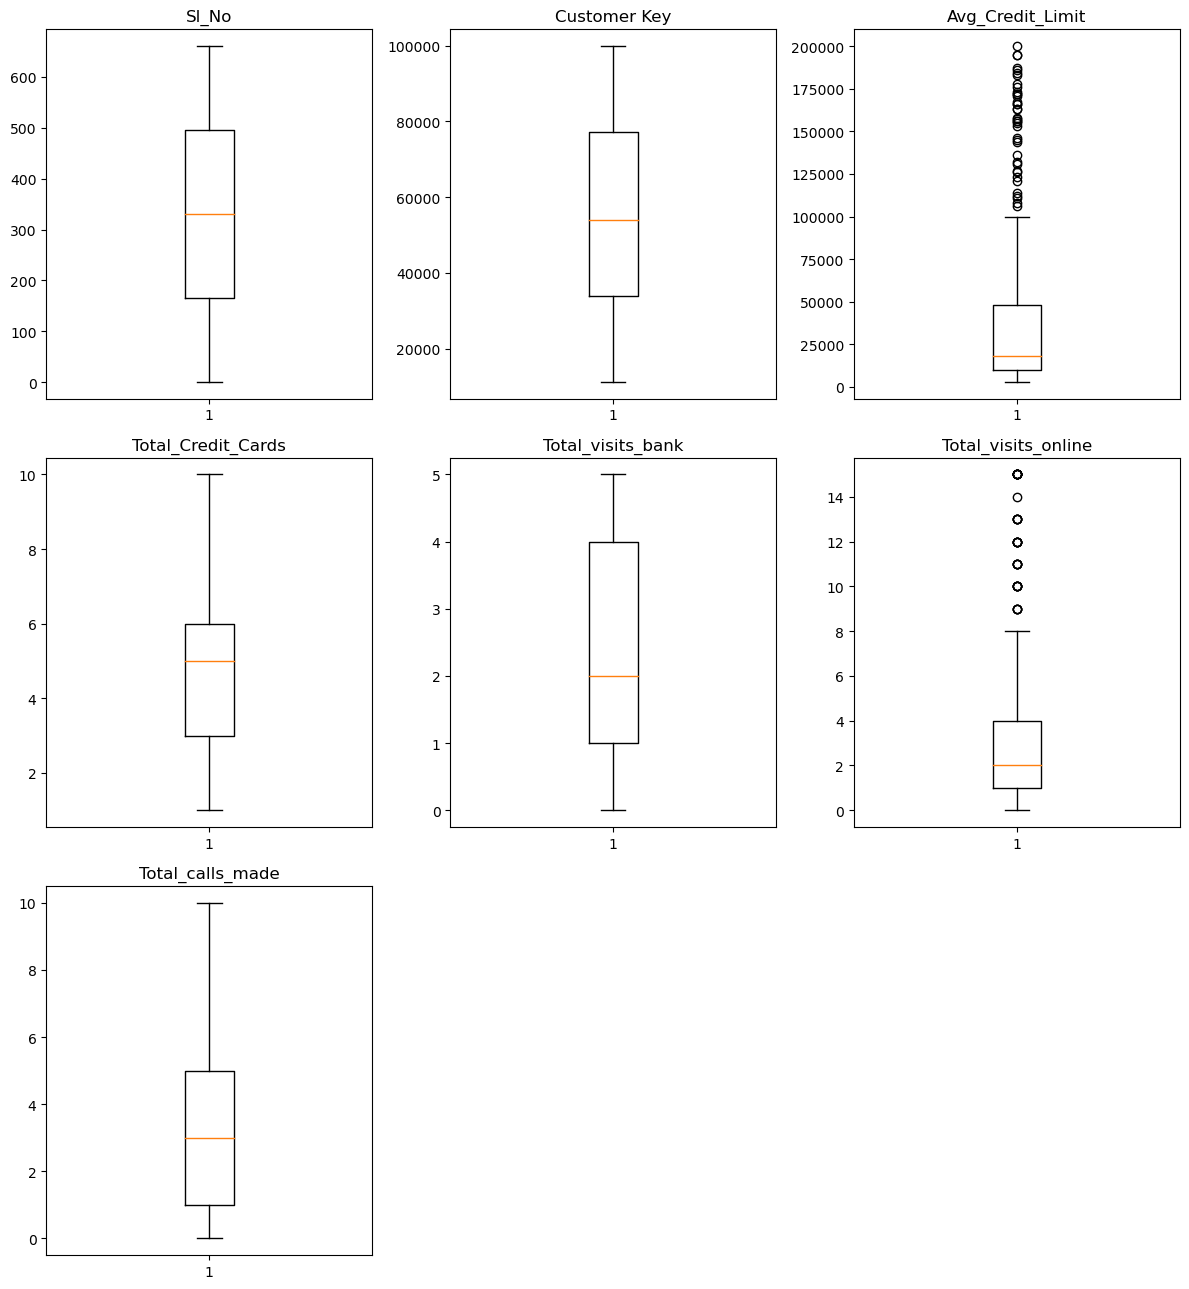

In [7]:
columns = dataset.columns
fig, axes = plt.subplots(nrows =3, ncols =3, figsize= (12, 13))
axes = axes.flatten()

for i, column in enumerate(columns):
    axes[i].boxplot(dataset[column])
    axes[i].set_title(column)
    
for j in range(len(columns), len(axes)):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()

### Visualiasi dan Analisis

In [8]:
mean_cl = round(dataset['Avg_Credit_Limit'].mean(), 2)

higher_mean_cl = dataset[dataset['Avg_Credit_Limit'] > mean_cl]
below_mean_cl = dataset[dataset['Avg_Credit_Limit'] < mean_cl]
print('Jumlah catatan yang memiliki skor kredit di atas rata-rata:', higher_mean_cl.shape[0])
print('Jumlah catatan yang memiliki skor kredit di bawah rata-rata :', below_mean_cl.shape[0])

Jumlah catatan yang memiliki skor kredit di atas rata-rata: 231
Jumlah catatan yang memiliki skor kredit di bawah rata-rata : 429


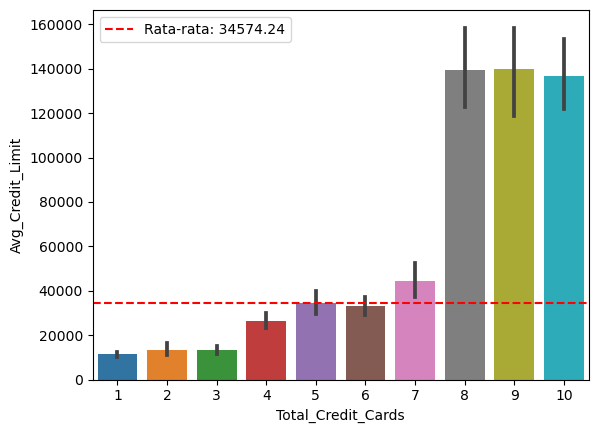

,Total_Credit_Cards,Avg_Credit_Limit
0,1,11457.63
1,2,13187.50
2,3,13301.89
3,4,26311.26
4,5,34689.19
5,6,33205.13
6,7,44495.05
7,8,139454.55
8,9,140090.91
9,10,136842.11


In [9]:
sns.barplot(data = dataset,x = dataset["Total_Credit_Cards"], y = dataset["Avg_Credit_Limit"])
plt.axhline(y=mean_cl, color='red', linestyle='--', label=f'Rata-rata: {mean_cl:.2f}')
plt.legend()
plt.show()
d = round(dataset.groupby('Total_Credit_Cards')['Avg_Credit_Limit'].mean(),2)
d.reset_index()

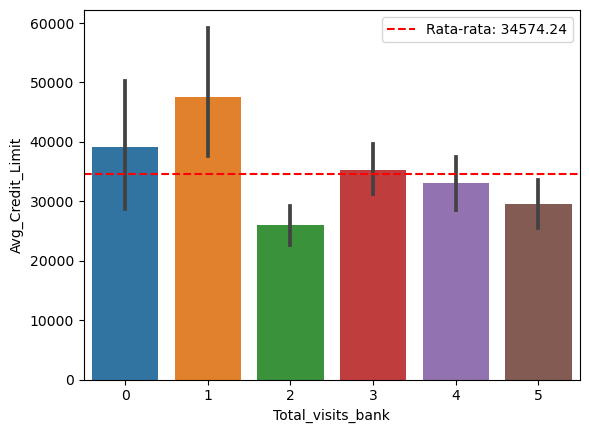

,Total_visits_bank,Avg_Credit_Limit
0,0,39150.00
1,1,47544.64
2,2,26050.63
3,3,35300.00
4,4,33000.00
5,5,29561.22


In [10]:
sns.barplot(data = dataset,x = dataset["Total_visits_bank"], y = dataset["Avg_Credit_Limit"])
plt.axhline(y=mean_cl, color='red', linestyle='--', label=f'Rata-rata: {mean_cl:.2f}')
plt.legend()

plt.show()
d = round(dataset.groupby('Total_visits_bank')['Avg_Credit_Limit'].mean(),2)
d.reset_index()

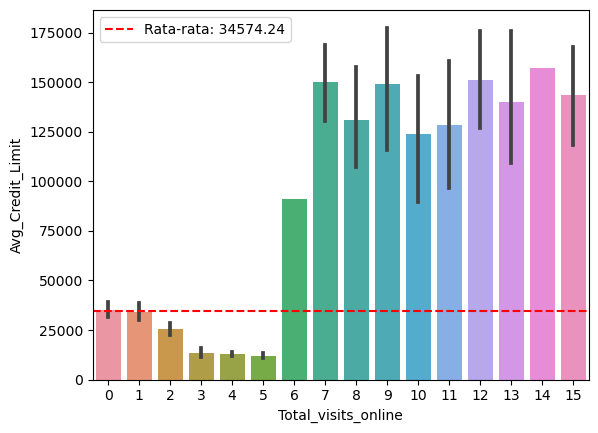

,Total_visits_online,Avg_Credit_Limit
0,0,35131.94
1,1,34091.74
2,2,25523.81
3,3,13272.73
4,4,12739.13
5,5,12129.63
6,6,91000.00
7,7,149857.14
8,8,130666.67
9,9,149250.00


In [11]:
sns.barplot(data = dataset,x = dataset["Total_visits_online"], y = dataset["Avg_Credit_Limit"])
plt.axhline(y=mean_cl, color='red', linestyle='--', label=f'Rata-rata: {mean_cl:.2f}')
plt.legend()

plt.show()
d = round(dataset.groupby('Total_visits_online')['Avg_Credit_Limit'].mean(),2)
d.reset_index()

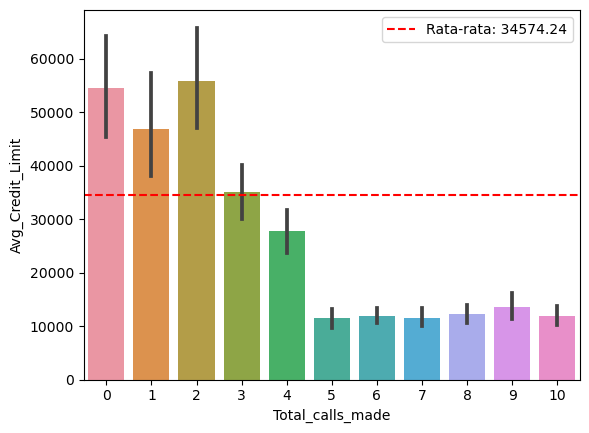

,Total_calls_made,Avg_Credit_Limit
0,0,54536.08
1,1,46877.78
2,2,55868.13
3,3,35120.48
4,4,27787.04
5,5,11482.76
6,6,11897.44
7,7,11571.43
8,8,12300.00
9,9,13500.00


In [12]:
sns.barplot(data = dataset,x = dataset["Total_calls_made"], y = dataset["Avg_Credit_Limit"])
plt.axhline(y=mean_cl, color='red', linestyle='--', label=f'Rata-rata: {mean_cl:.2f}')
plt.legend()

plt.show()

d = round(dataset.groupby('Total_calls_made')['Avg_Credit_Limit'].mean(),2)
d.reset_index()

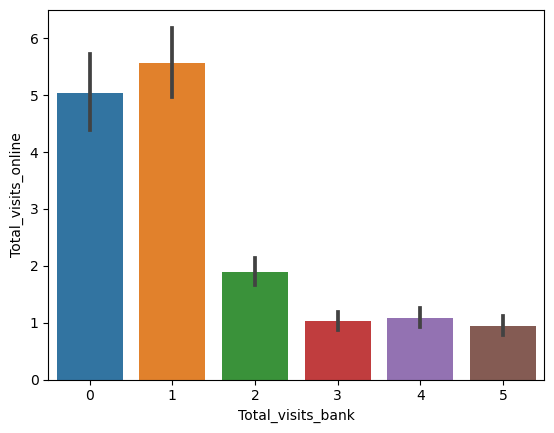

In [13]:
sns.barplot(x = dataset["Total_visits_bank"], y= dataset["Total_visits_online"])
plt.show()

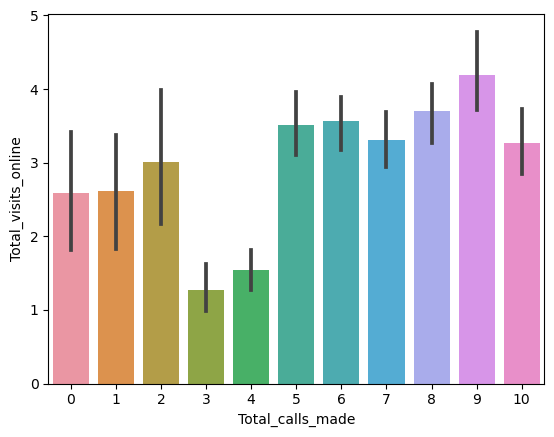

In [14]:
sns.barplot(x = dataset["Total_calls_made"], y= dataset["Total_visits_online"])
plt.show()

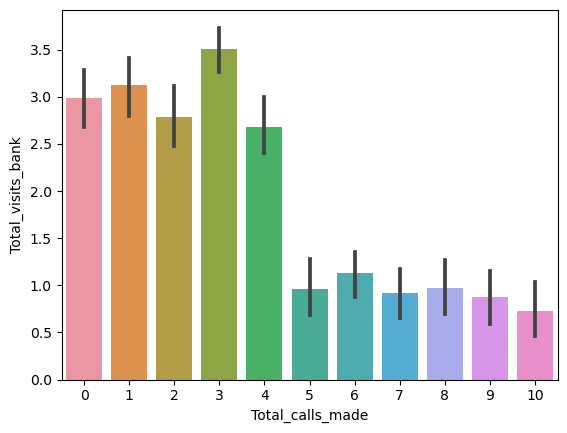

In [15]:
sns.barplot(x = dataset["Total_calls_made"], y= dataset["Total_visits_bank"])
plt.show()

<Axes: >

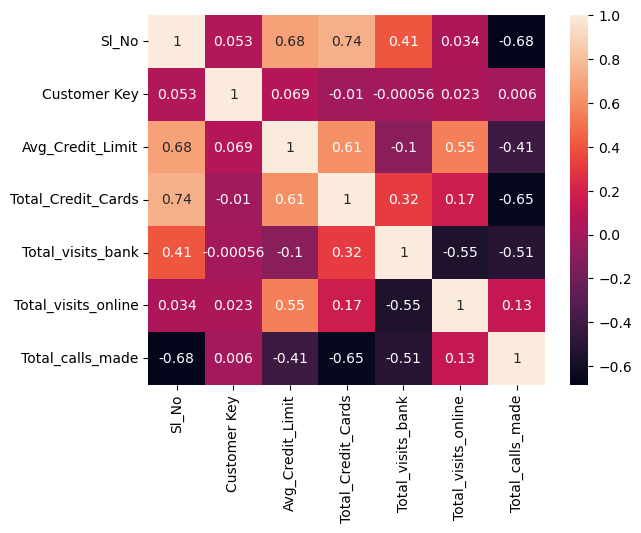

In [16]:
sns.heatmap(dataset.corr(), annot=True)

### Preprosesing Data

In [17]:
X = dataset.drop(['Sl_No', 'Customer Key'], axis=1).reset_index()

In [18]:
X

,index,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0,100000,2,1,1,0
1,1,50000,3,0,10,9
2,2,50000,7,1,3,4
3,3,30000,5,1,1,4
4,4,100000,6,0,12,3
...,...,...,...,...,...,...
655,655,99000,10,1,10,0
656,656,84000,10,1,13,2
657,657,145000,8,1,9,1
658,658,172000,10,1,15,0


In [19]:
# memilih fitur yang akan dipakai
X = dataset.iloc[:,[2,3]]
X

,Avg_Credit_Limit,Total_Credit_Cards
0,100000,2
1,50000,3
2,50000,7
3,30000,5
4,100000,6
...,...,...
655,99000,10
656,84000,10
657,145000,8
658,172000,10


In [20]:
# normalisasi data agar data tidak memiliki penyimpangan yang besar
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 1.74018685, -1.24922476],
       [ 0.41029254, -0.78758515],
       [ 0.41029254,  1.05897329],
       ...,
       [ 2.93709172,  1.5206129 ],
       [ 3.65523464,  2.44389211],
       [ 3.52224521,  1.9822525 ]])

### Modelling

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\clust

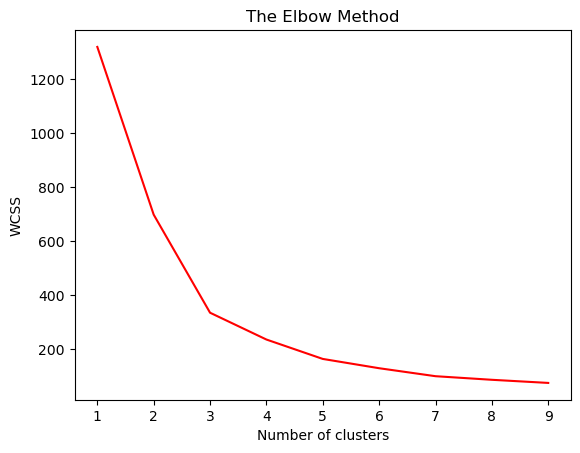

In [22]:
from sklearn.cluster import KMeans
wcss=[]

# asumsi jumlah K berada di antara 1 sampai 10
for i in range(1,10):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss, color = 'red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
from sklearn.cluster import KMeans

# menentukan jumlah cluster
kmeans = KMeans(n_clusters=3)

# fitting input data
kmeans = kmeans.fit(X)

# mendapatkan cluster labels
labels = kmeans.predict(X)

# mendapatkan nilai centroid
centroids = kmeans.cluster_centers_

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
dataset['Cluster'] = labels
dataset

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,1,87073,100000,2,1,1,0,2
1,2,38414,50000,3,0,10,9,2
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,0
4,5,47437,100000,6,0,12,3,0
...,...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0,1
656,657,60732,84000,10,1,13,2,1
657,658,53834,145000,8,1,9,1,1
658,659,80655,172000,10,1,15,0,1


In [29]:
centroids

array([[ 0.06907501,  0.50698219],
       [ 2.87724647,  1.92454755],
       [-0.56384337, -0.90582968]])

In [31]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)
y_kmeans # hasil clustering

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,

In [33]:
# jumlah anggota masing-masing cluster
pred = y_kmeans
dataset['Cluster'] = pred
dataset['Cluster'].value_counts()

0    330
1    282
2     48
Name: Cluster, dtype: int64

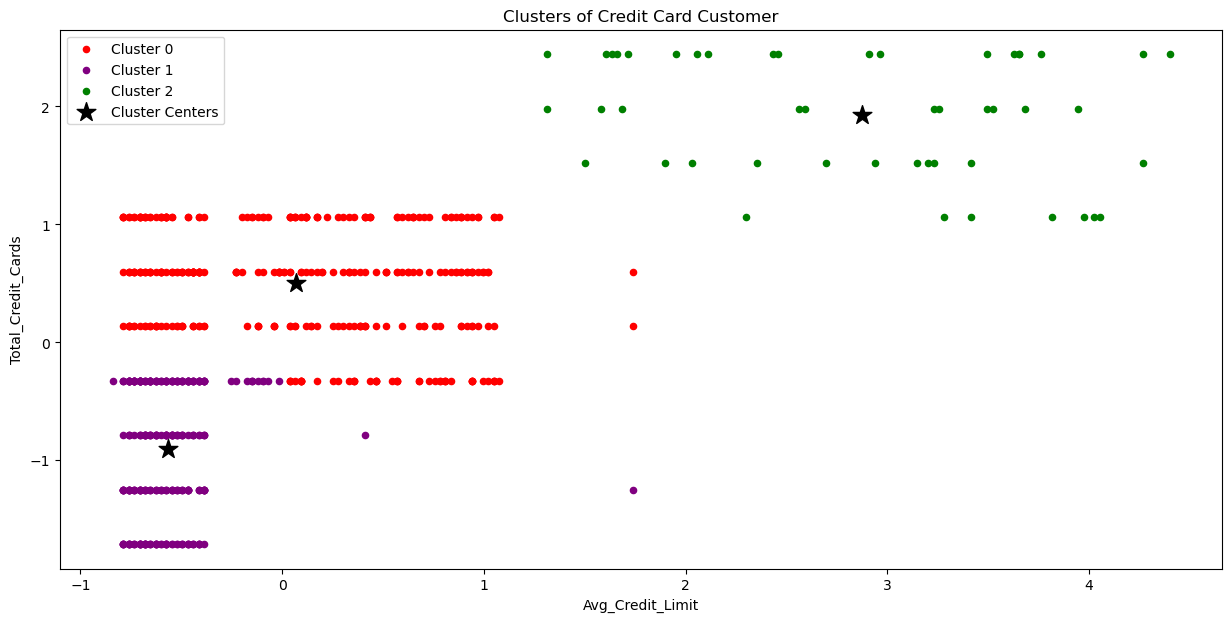

In [37]:
#Visualizing all the clusters 
fig, ax = plt.subplots(figsize=(15, 7))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], s=20, c='red', label='Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], s=20, c='purple', label='Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], s=20, c='green', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', label='Cluster Centers', marker='*')
plt.title('Clusters of Credit Card Customer')
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')
plt.legend(loc='best')
plt.show()